In [219]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
import pandas as pd

tf.config.list_physical_devices('GPU')

[]

In [226]:
dataset = pd.read_csv('../dataset/lung-cancer-2.csv')

dataset.replace({"F":0,"M":1}, inplace=True)
dataset[['SMOKING','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHRONIC_DISEASE','FATIGUE','ALLERGY','WHEEZING','ALCOHOL_CONSUMING','COUGHING','SHORTNESS_OF_BREATH','SWALLOWING_DIFFICULTY','CHEST_PAIN']] = dataset[['SMOKING','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHRONIC_DISEASE','FATIGUE','ALLERGY','WHEEZING','ALCOHOL_CONSUMING','COUGHING','SHORTNESS_OF_BREATH','SWALLOWING_DIFFICULTY','CHEST_PAIN']].replace({1:0, 2:1})
dataset[['LUNG_CANCER']] = dataset[['LUNG_CANCER']].replace({"NO":0, "YES":1})
dataset.drop(['YELLOW_FINGERS','PEER_PRESSURE','CHRONIC_DISEASE','ALLERGY','WHEEZING'], axis=1,inplace=True)

feature = dataset.drop('LUNG_CANCER',axis=1)
target = dataset['LUNG_CANCER']

In [227]:
X_train, X_test, y_train, y_test = train_test_split(
    feature,target,
    test_size=0.2,
    random_state=np.random.randint(10))

In [228]:
model = Sequential()

model.add(Dense(10, input_shape=(10,), activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dropout(0.02))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [229]:
early_break = EarlyStopping(monitor='loss', patience=10)
reduce_learning_rate = ReduceLROnPlateau(patience=5)

result = model.fit(X_train, y_train, epochs = 200, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_break,reduce_learning_rate])

Epoch 1/200
8/8 [==============================] - 0s 17ms/step - loss: 1.6248 - accuracy: 0.1296 - val_loss: 1.2385 - val_accuracy: 0.1452 - lr: 0.0010
Epoch 2/200
8/8 [==============================] - 0s 4ms/step - loss: 1.0707 - accuracy: 0.1538 - val_loss: 0.8268 - val_accuracy: 0.1452 - lr: 0.0010
Epoch 3/200
8/8 [==============================] - 0s 4ms/step - loss: 0.7487 - accuracy: 0.4575 - val_loss: 0.6852 - val_accuracy: 0.8548 - lr: 0.0010
Epoch 4/200
8/8 [==============================] - 0s 4ms/step - loss: 0.6917 - accuracy: 0.8502 - val_loss: 0.6830 - val_accuracy: 0.8548 - lr: 0.0010
Epoch 5/200
8/8 [==============================] - 0s 4ms/step - loss: 0.6850 - accuracy: 0.8623 - val_loss: 0.6808 - val_accuracy: 0.8548 - lr: 0.0010
Epoch 6/200
8/8 [==============================] - 0s 4ms/step - loss: 0.6787 - accuracy: 0.8785 - val_loss: 0.6787 - val_accuracy: 0.8548 - lr: 0.0010
Epoch 7/200
8/8 [==============================] - 0s 4ms/step - loss: 0.6784 - accurac

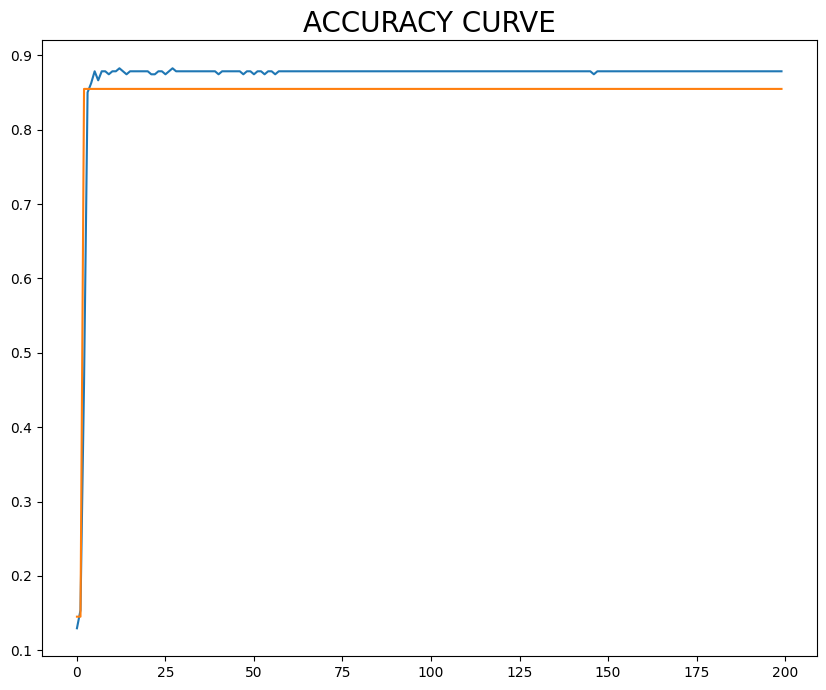

In [230]:
plt.figure(figsize=(10,8))
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('ACCURACY CURVE',fontdict={'size':20})
plt.show()

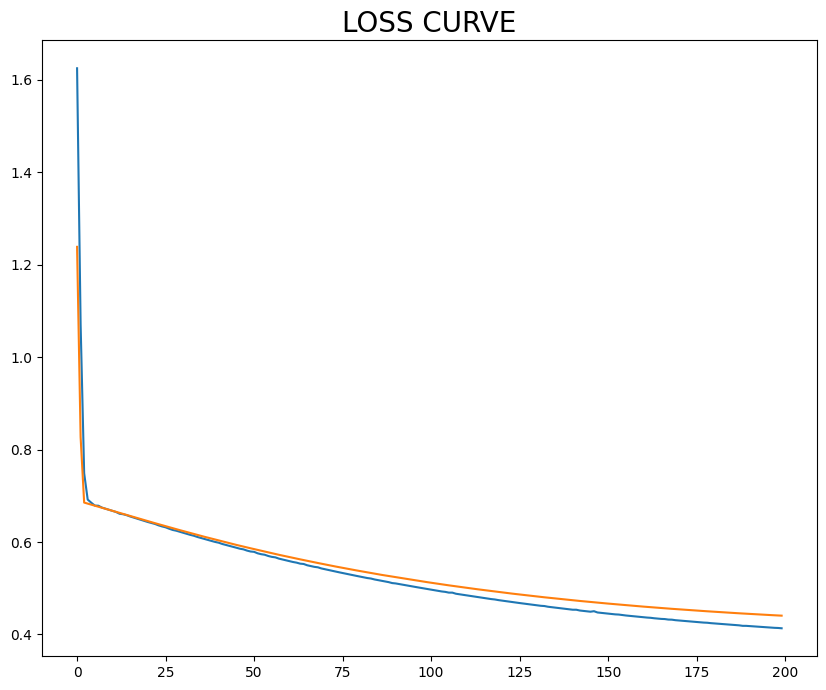

In [231]:
plt.figure(figsize=(10,8))
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('LOSS CURVE',fontdict={'size':20})
plt.show()

In [232]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 1ms/step - loss: 0.4405 - accuracy: 0.8548


[0.44054609537124634, 0.8548387289047241]

In [233]:
model.save('./model',overwrite=True)

INFO:tensorflow:Assets written to: ./model\assets
